In [39]:
# Dependencies
import pandas as pd
from pathlib import Path
import seaborn as sns
import matplotlib.pyplot as plt


In [40]:
#Read CSV file
Tokyo_Airbnb_df = pd.read_csv("updated_summarylist.csv")
Tokyo_Airbnb_df

,id,name,neighbourhood,latitude,longitude,host_id,host_name,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,availability_365,ratings,bedrooms,beds,baths
0,197677,Rental unit in Sumida,Sumida Ku,35.717070,139.826080,964081,Yoshimi & Marek,Entire home/apt,11000,3,173,1.21,24,4.78,1.0,2.0,1.0
1,776070,Home in Kita-ku,Kita Ku,35.738440,139.769170,801494,Kei,Private room,7208,3,243,1.89,67,4.98,1.0,1.0,1.0
2,3427384,Rental unit in Edogawa,Edogawa Ku,35.683740,139.859710,13018876,Masakatsu,Entire home/apt,7847,2,100,0.93,231,4.82,1.0,2.0,1.0
3,905944,Rental unit in Shibuya,Shibuya Ku,35.678780,139.678470,4847803,Best Stay In Tokyo!,Entire home/apt,23066,3,186,1.49,229,4.76,2.0,4.0,1.0
4,3514008,Rental unit in Arakawa-ku,Arakawa Ku,35.726720,139.782010,17694529,Hisao,Entire home/apt,2871,1,269,2.59,11,4.86,1.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7184,901947055812947891,Home in Arakawa City,Arakawa Ku,35.731654,139.770450,68939316,Scott,Entire home/apt,16071,2,4,4.00,196,5.00,2.0,4.0,1.0
7185,902073975805385638,Rental unit in Shinjuku City,Shinjuku Ku,35.700143,139.705867,230604374,Ken,Entire home/apt,70000,1,3,3.00,105,5.00,7.0,6.0,2.0
7186,908560763335734577,Rental unit in Shinjuku City,Shinjuku Ku,35.709670,139.716580,44425048,Hong,Entire home/apt,28657,2,4,4.00,103,5.00,2.0,2.0,1.0
7187,907130824350980779,Rental unit in Toshima City,Toshima Ku,35.728012,139.730715,497909429,Ray,Entire home/apt,13429,1,3,3.00,63,5.00,1.0,2.0,1.0


In [41]:
#Count the nukmber of neighbourhoods 
name_count = Tokyo_Airbnb_df['neighbourhood'].nunique()
name_count

46

In [42]:
#select random neighborhoud to produce a heat map in seaborn 
random_neighborhoods = Tokyo_Airbnb_df['neighbourhood'].sample(n=15, random_state=42).unique()
filtered_neighborhoods_df = Tokyo_Airbnb_df[Tokyo_Airbnb_df['neighbourhood'].isin(random_neighborhoods)]
filtered_neighborhoods_df

,id,name,neighbourhood,latitude,longitude,host_id,host_name,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,availability_365,ratings,bedrooms,beds,baths
0,197677,Rental unit in Sumida,Sumida Ku,35.717070,139.826080,964081,Yoshimi & Marek,Entire home/apt,11000,3,173,1.21,24,4.78,1.0,2.0,1.0
1,776070,Home in Kita-ku,Kita Ku,35.738440,139.769170,801494,Kei,Private room,7208,3,243,1.89,67,4.98,1.0,1.0,1.0
2,3427384,Rental unit in Edogawa,Edogawa Ku,35.683740,139.859710,13018876,Masakatsu,Entire home/apt,7847,2,100,0.93,231,4.82,1.0,2.0,1.0
3,905944,Rental unit in Shibuya,Shibuya Ku,35.678780,139.678470,4847803,Best Stay In Tokyo!,Entire home/apt,23066,3,186,1.49,229,4.76,2.0,4.0,1.0
7,3572139,Home in Toshima-ku,Toshima Ku,35.727843,139.734084,15514130,Tomo,Entire home/apt,31229,3,201,2.10,196,4.85,3.0,6.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7183,901940636389942127,Rental unit in Shinjuku City,Shinjuku Ku,35.695502,139.705554,248608259,Haruka,Entire home/apt,13629,2,6,6.00,138,4.50,1.0,2.0,1.0
7185,902073975805385638,Rental unit in Shinjuku City,Shinjuku Ku,35.700143,139.705867,230604374,Ken,Entire home/apt,70000,1,3,3.00,105,5.00,7.0,6.0,2.0
7186,908560763335734577,Rental unit in Shinjuku City,Shinjuku Ku,35.709670,139.716580,44425048,Hong,Entire home/apt,28657,2,4,4.00,103,5.00,2.0,2.0,1.0
7187,907130824350980779,Rental unit in Toshima City,Toshima Ku,35.728012,139.730715,497909429,Ray,Entire home/apt,13429,1,3,3.00,63,5.00,1.0,2.0,1.0


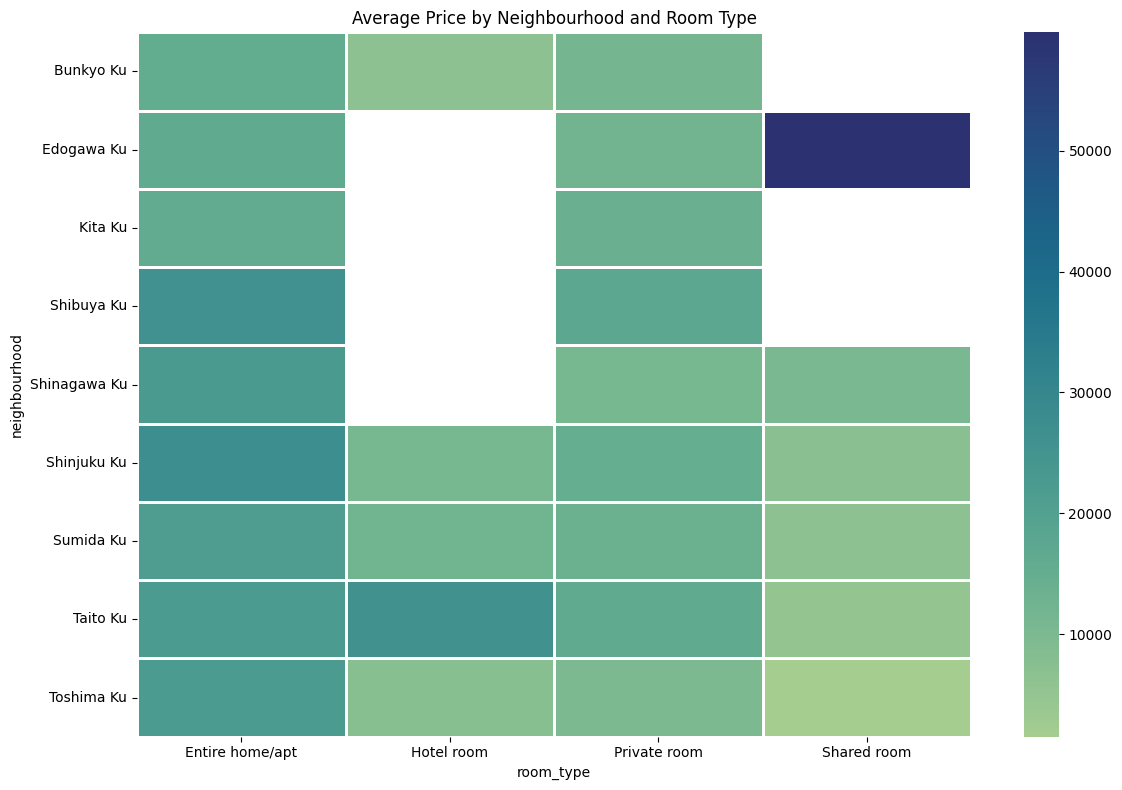

In [63]:
# Generate a heat map for neighbourhood, room type, and price relation
neighbourhood_roomtype_price = filtered_neighborhoods_df.pivot_table(index='neighbourhood', columns='room_type', values='price', aggfunc='mean')

#Create a fig size, adjust the layout, and save the png file
plt.figure(figsize=(12, 8))
sns.heatmap(neighbourhood_roomtype_price, cmap='crest', linewidths=.75)
plt.title('Average Price by Neighbourhood and Room Type')
plt.tight_layout()
plt.savefig('../Average Price by Neighbourhood and Room Type heat map.png', format='png')
plt.show()

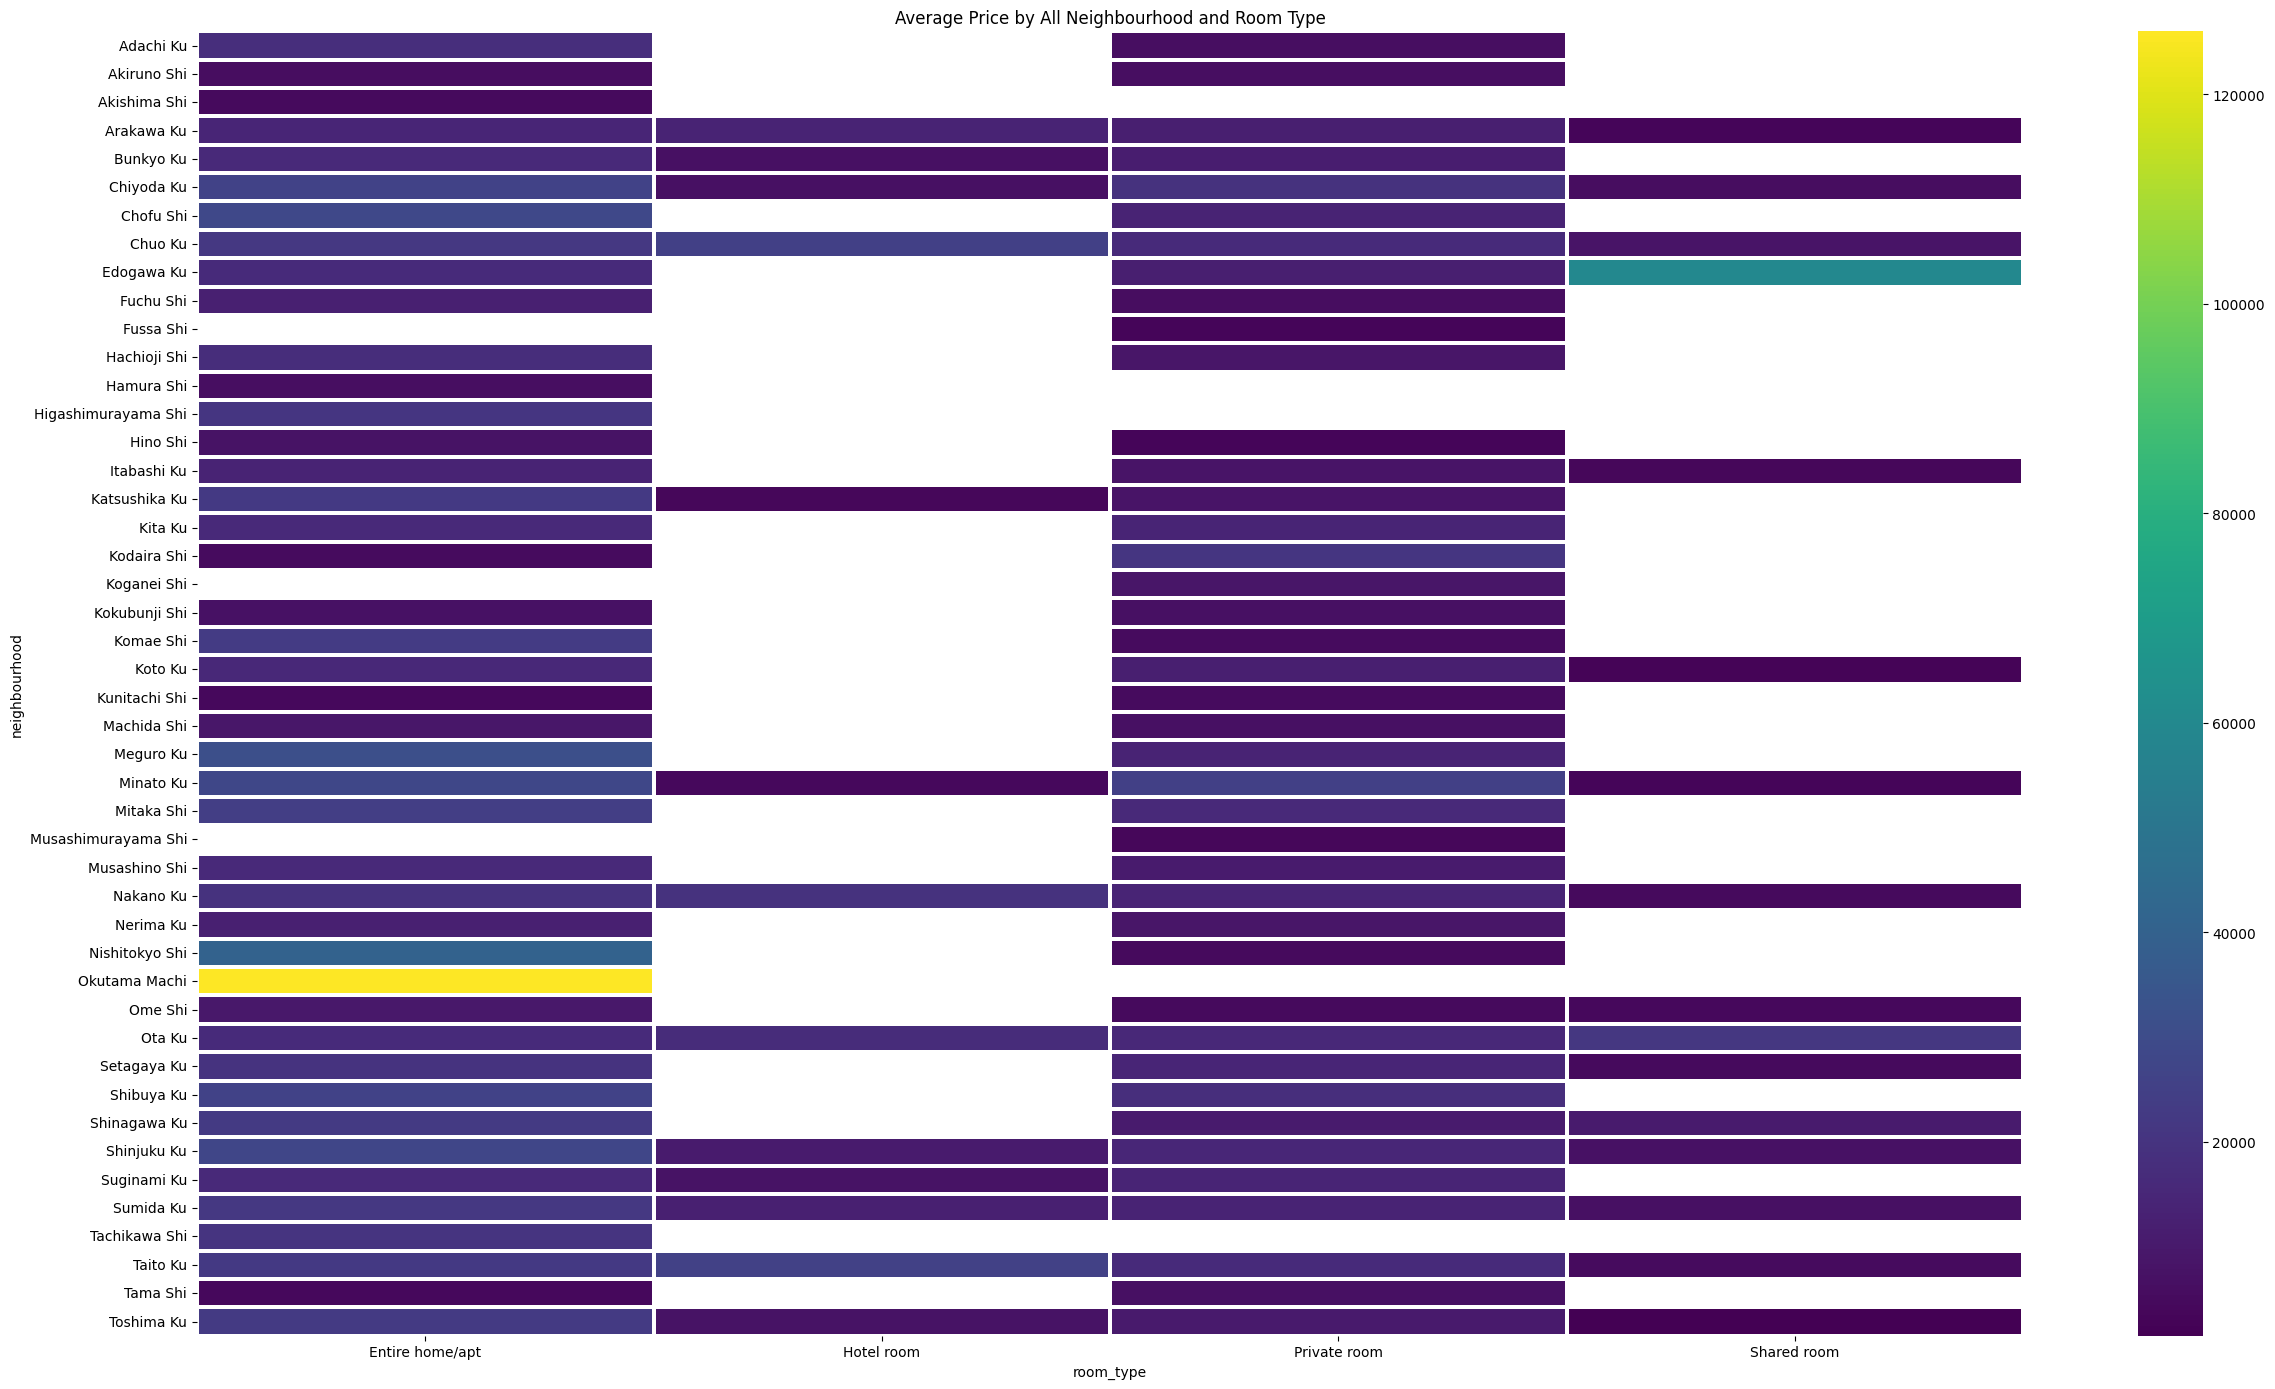

In [62]:
# Generate a heat map for neighbourhood, room type, and price relation
all_neighbourhood_roomtype_price = Tokyo_Airbnb_df.pivot_table(index='neighbourhood', columns='room_type', values='price', aggfunc='mean')

#Create a fig size, adjust the layout, and save the png file
plt.figure(figsize=(25, 14))
sns.heatmap(all_neighbourhood_roomtype_price, cmap='viridis', linewidths=1.5)
plt.title('Average Price by All Neighbourhood and Room Type')
plt.tight_layout()
plt.savefig('../Average Price by All Neighbourhood and Room Type heat map.png', format='png')
plt.show()

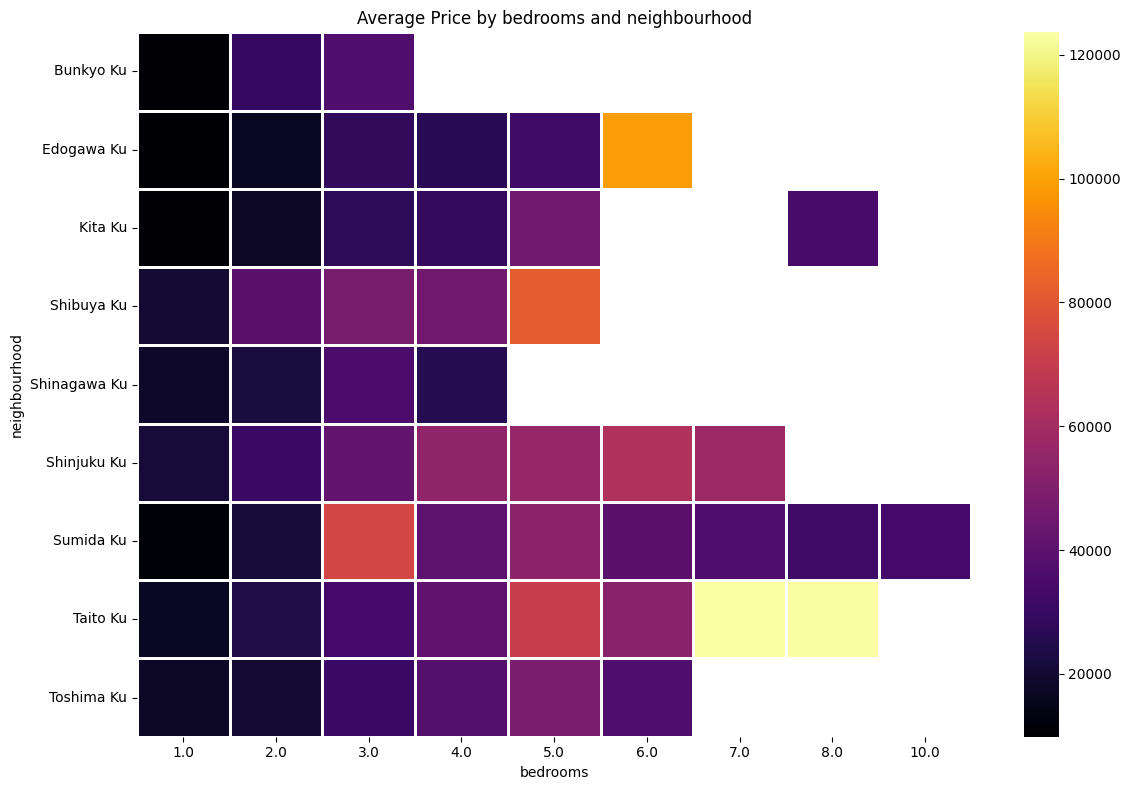

In [53]:
# Generate a heat map for neighbourhood, number of beddrooms, and price relation
bedroomstype_price = filtered_neighborhoods_df.pivot_table(index='neighbourhood', columns='bedrooms', values='price', aggfunc='mean')
# Create a fig size, adjust the layout, and save the png file
plt.figure(figsize=(12, 8))
sns.heatmap(bedroomstype_price, cmap='inferno', linewidths=.75)
plt.title('Average Price by bedrooms and neighbourhood')
plt.tight_layout()
plt.savefig('../Average Price by bedrooms and neighbourhood heat map.png', format='png')
plt.show()